accuracy score:100.00%


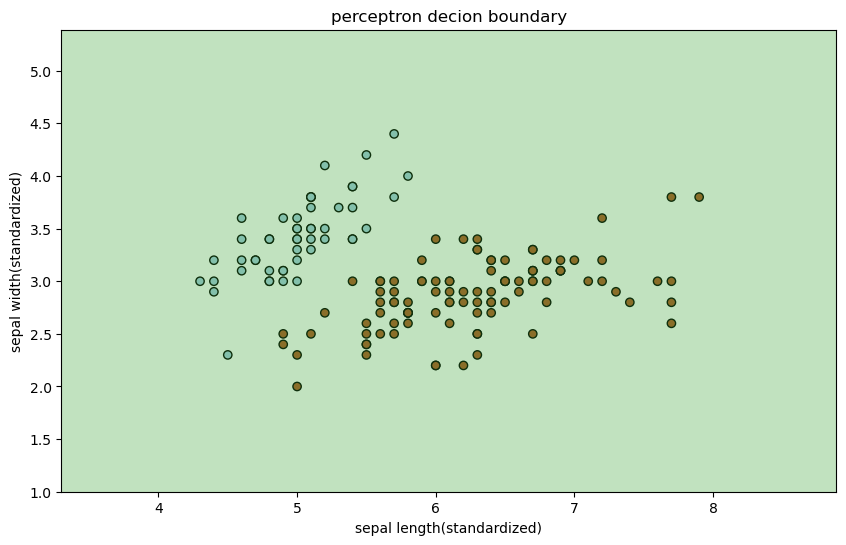

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

iris=datasets.load_iris()
x=iris.data[:,:2]
y=(iris.target!=0)*1
x_t,xt,y_t,yt=train_test_split(x,y,test_size=0.3,random_state=42)
s=StandardScaler()
x_t=s.fit_transform(x_t)
xt=s.transform(xt)
p=Perceptron(max_iter=100,eta0=0.1,random_state=42)
p.fit(x_t,y_t)
y_p=p.predict(xt)
a=accuracy_score(yt,y_p)


print(f'accuracy score:{a*100:.2f}%')
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired,edgecolors='k',marker='o')
plt.xlabel('sepal length(standardized)')
plt.ylabel('sepal width(standardized)')
plt.title('perceptron decion boundary')
xm,xm1=x[:,0].min()-1,x[:,0].max()+1
ym,ym1=x[:,1].min()-1,x[:,1].max()+1
xx,yy=np.meshgrid(np.arange(xm,xm1,0.01),np.arange(ym,ym1,0.01))
z=p.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha=0.3,cmap=plt.cm.Paired)
plt.show()